In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Our report is organized in such a way, that at each section, we first import the results from the computations made by the functions in *utilities.py*.

A summarized explanation on how we computed these results then immediately follows after importing them.

For detailed commentary on the code steps, refer to the corresponding functions in utilities.py."

# Data Understanding

## 1. Exploratory Data Analysis

- Examination and understanding of the dataset's structure and content.
- Performing exploratory data analysis to understand data patterns, outliers, and relationships between variables.

Summary of the Data Exploration: 

There are many redundancies in the data. The business_entity_doing_business_as_name uniquely defines the compset_group,  the list of compsets, legal_entity_name, domicile_country_name, ultimate_parent_legal_entity_name and primary_exchange_name. Additionally there are duplicate rows only differing in the compset. 

To remove redundancies and format the data in a suitable way for further analysis we created a clean_data function. The functionality of the function is described below:

We checked in Data_Cleaning_js.ipynb that the column names listed above do not change over time for any business_entity_doing_business_as_name. There are also no NaNs in business_entity_doing_business_as_name, this column can therefore be interpreted as keys, defining the other entries in the other columns listed above. We therefore extract these meta-information into a different data-frame called df_brands.

Additionally the summary rows with compset='All Brands' are extracted to a data-frame df_allbrands.

The main df now contains only the period_end_date, business_entity_doing_business_as_name and the five numerical quantities. Additionally a list of brands, compsets, compset_groups is provided


In [2]:
from utilities import clean_data

In [3]:
df, df_brands, df_allbrands, brands, compsets, compset_groups, groups_bycompset = clean_data()

## 2. Data Cleaning

### Handling Missing Values

In [4]:
from utilities import missing_df, missing_values

In order to get a feeling of the distribution and magnitude of the missing values, we created a new datafram *missing_df* containing the total number of entries per business and the total number of missing values per business per category.

In [5]:
missing_df = missing_df(df)

print(missing_df.shape)
missing_df.head()

(705, 7)


,Business,Total Entries:,Missing followers:,Missing pictures:,Missing videos:,Missing comments:,Missing likes:
0,24S,333,20,1,1,1,1
1,3.1 Phillip Lim,455,18,0,0,0,0
2,3CE,455,131,0,0,0,0
3,A. Lange & Soehne,403,8,3,2,2,2
4,ANIMALE,403,131,0,2,0,0


In the function *missing_values()*, we reorganized the DataFrame *df* by date and business, revealing numerous initial missing-value-series across many businesses. By removing these initial series, we reduced the number of rows containing at least one missing value from 65,868 to 4,378.

By identifying the lengths and locations of all remaining missing-value-series in the data, we manage to further decrease the number of rows containing at least one missing value to 4,145. This represents a $ 94 \% $ decrease in rows containing at least one missing value.

In [6]:
cleaned_df = missing_values(df)

Number of rows with at least one NaN before cleaning: 65868
Number of rows with at least one NaN after dropping series of Nan's at beginning of businesses: 4378


Based on the following facts:
- Most of the remaining missing values were are all series of lengths greater than 20, spread randomly through the data.
- There were only 4,145 of the total of 236,317 rows left that contained at least one missing value.

We made the following **assumption**:
- We assumed that the remaining missing values would not affect the performance of our model significantly.

Based on that we decided to leave the remaining missing values for now, and check after implementing the model wether our assumption was correct.

 

### Normalization

In [ ]:
#from utilities import normalization

In [ ]:
#include normalization function here

# Modeling Approach

## 1. Feature Engineering

- Feature engineering to create relevant features for identifying deviations.

In [6]:
from utilities import derivatives_data

In [ ]:
#include the calculation of first and second derivatives here

### Ranking the followers

By grouping the brands (business_entity_doing_business_as_name)

In [4]:
from utilities import ranking_followers
from scipy.signal import find_peaks
import math

In [5]:
cgroup_ranking, brands_by_cgroup = ranking_followers(df, df_brands, compset_groups)

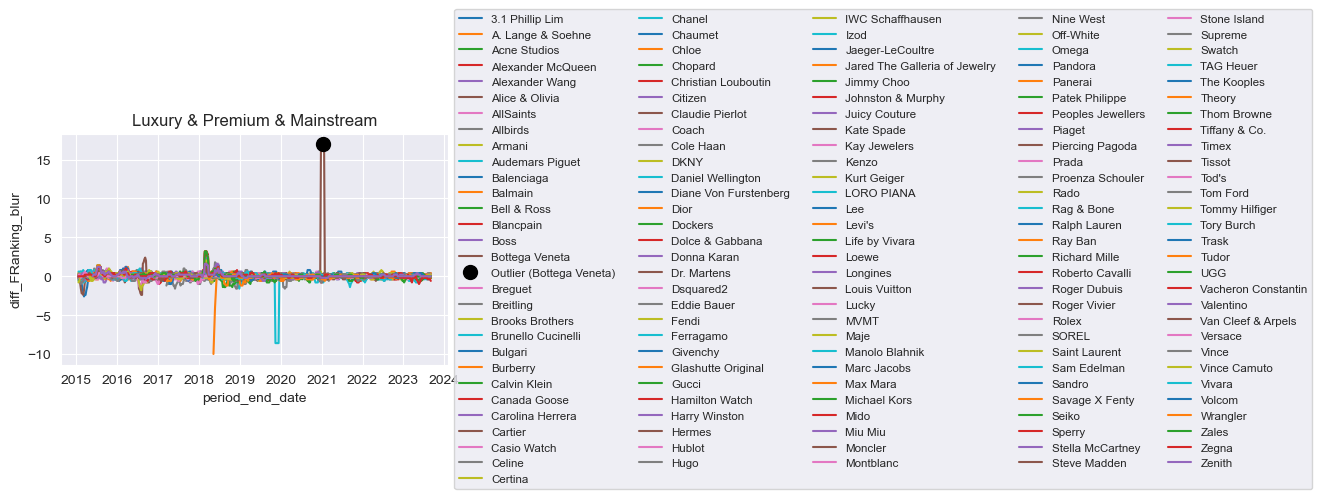

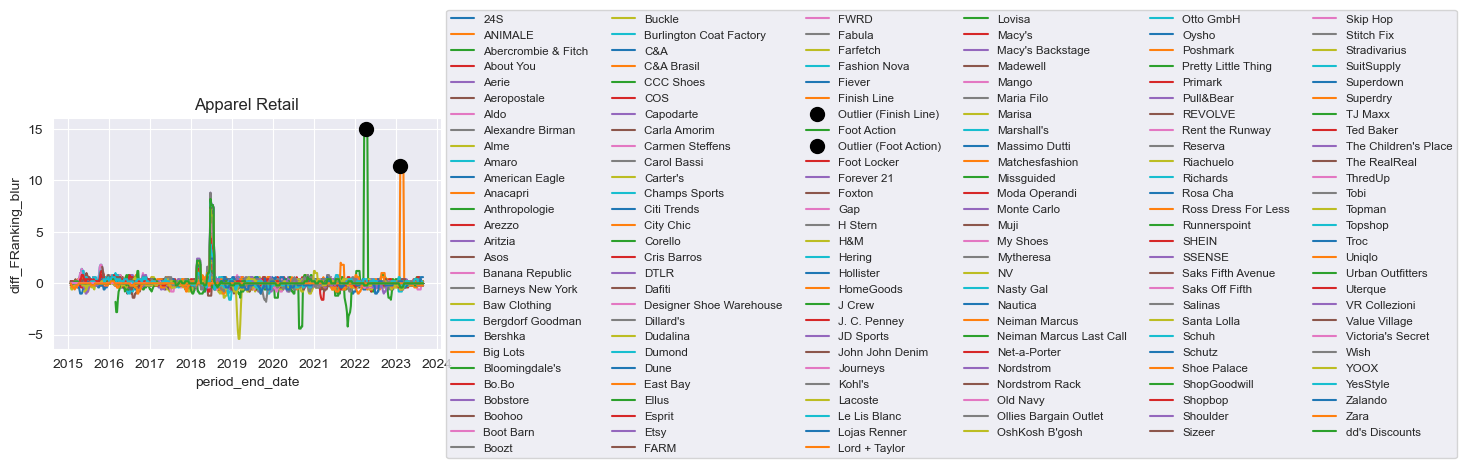

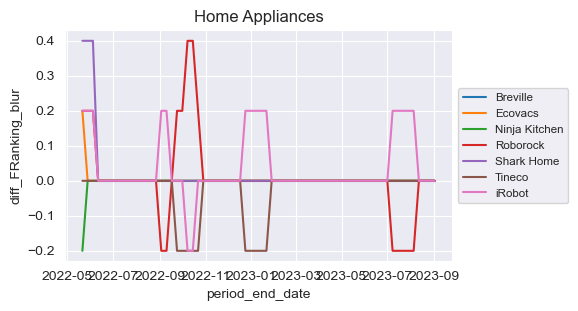

In [6]:
selection_of_cgroups=['Luxury & Premium & Mainstream', 'Apparel Retail','Home Appliances']

for cgroup in selection_of_cgroups:
    peaks = {}
    peak_height = {}
    peak_time = {}
    for brand, data in cgroup_ranking[cgroup].groupby('business_entity_doing_business_as_name'):
        peaks[brand], _ = find_peaks(list(data['diff_FRanking_blur']), height=2)
        peak_height[brand] = np.array(data['diff_FRanking_blur'])[peaks[brand]]
        peak_time[brand] = np.array(data['period_end_date'])[peaks[brand]]
        
    all=np.concatenate(list(peak_height.values()))
    threshold = 2

    plt.figure(figsize=(5,3))
    for brand, data in cgroup_ranking[cgroup].groupby('business_entity_doing_business_as_name'):
        plt.plot(data['period_end_date'], data['diff_FRanking_blur'], label=brand)
        if len(peak_time[brand])>0:
            z_scores = (peak_height[brand] - np.mean(all)) / np.std(all)
            if len(peak_time[brand][np.abs(z_scores) > threshold])>0:
                plt.plot(peak_time[brand][np.abs(z_scores) > threshold], peak_height[brand][np.abs(z_scores) > threshold], 'ko', markersize=10, label=f'Outlier ({brand})')
    plt.xlabel('period_end_date')
    plt.ylabel('diff_FRanking_blur')
    plt.title(cgroup)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small', ncol=math.ceil(len(brands_by_cgroup[cgroup])/30))
    plt.grid(True)
    plt.show()

## 2. Development of Model

- Development of a model to identify significant deviations from observed trends.

## 3. Evaluation of Model

- Evaluation of the model's performance and its ability to identify deviations.

# Evaluation of Results

## 1. Analysis of deviations

- Analysis of deviations detected by your model, understanding potential causes.

## 2. Interpretation of the results

- Interpretation of the results, providing strategic insights based on deviations.

## 3. Use of alternative approaches

- Use of alternative approaches (potential enhancement of dataset with external data).